---
title: STATS 3DA3
subtitle: Homework Assignment 6
author: "Pratheepa Jeganathan"
date: 04/04/2024
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
bibliography: ass6.bib
---

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

In [790]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [791]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [792]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [793]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [794]:
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [795]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [796]:
y.dtypes

class    object
dtype: object

In [797]:
X['rbc'].value_counts()

rbc
normal      201
abnormal     47
Name: count, dtype: int64

In [798]:
X['pc'].value_counts()

pc
normal      259
abnormal     76
Name: count, dtype: int64

In [799]:
X['pcc'].value_counts()

pcc
notpresent    354
present        42
Name: count, dtype: int64

In [800]:
X['ba'].value_counts()

ba
notpresent    374
present        22
Name: count, dtype: int64

In [801]:
X['htn'].value_counts()

htn
no     251
yes    147
Name: count, dtype: int64

In [802]:
X['dm'].value_counts()

dm
no      260
yes     137
\tno      1
Name: count, dtype: int64

In [803]:
X_cat = set(X["dm"])
X_cat

{'\tno', nan, 'no', 'yes'}

In [804]:
X['dm'] = X['dm'].replace('\tno', 'no')
X_cat = set(X["dm"])
X_cat

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_27601/2603409864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dm'] = X['dm'].replace('\tno', 'no')


{nan, 'no', 'yes'}

In [805]:
X['dm'].value_counts()

dm
no     261
yes    137
Name: count, dtype: int64

In [806]:
X['cad'].value_counts()

cad
no     364
yes     34
Name: count, dtype: int64

In [807]:
X['appet'].value_counts()

appet
good    317
poor     82
Name: count, dtype: int64

In [808]:
X['pe'].value_counts()

pe
no     323
yes     76
Name: count, dtype: int64

In [809]:
X['ane'].value_counts()

ane
no     339
yes     60
Name: count, dtype: int64

In [810]:
y['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [811]:
y_cat = set(y["class"])
y_cat

{'ckd', 'ckd\t', 'notckd'}

In [812]:
y['class'] = y['class'].replace('ckd\t', 'ckd')
y_cat = set(y["class"])
y_cat

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_27601/1402900162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace('ckd\t', 'ckd')


{'ckd', 'notckd'}

In [813]:
y['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [814]:
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [815]:
y.isnull().sum()

class    0
dtype: int64

# Algorithm1:

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

There are 400 observations and 25 variables in Chronic Kidney Disease dataset. 
There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc".
There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".
In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the respnse is binary.

There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44  missing values in "bgr", 19  missing values in "bu", 17  missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2  missing values in "htn", 2  missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [816]:
columns_to_convert = ['sg', 'al','su']
for col in columns_to_convert:
    X[col] = pd.Categorical(X[col])

object_convert =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
for col in object_convert:
    X[col] = X[col].astype('category').cat.codes
X.dtypes

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_27601/2114956444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.Categorical(X[col])
/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_27601/2114956444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_27601/2114956444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

In [817]:
#cat = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#X = pd.get_dummies(X,columns=cat)
#caty = ['class']
#y = pd.get_dummies(y,columns=caty)

In [832]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,0,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,0,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,1,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,0,0,0


In [833]:
#why 3 categories?
X['rbc'].value_counts()

rbc
 1    201
-1    152
 0     47
Name: count, dtype: int64

In [818]:
X['pe'].value_counts()

pe
 0    323
 1     76
-1      1
Name: count, dtype: int64

In [819]:
y.head()

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd


In [820]:
float_col = X.select_dtypes(include=['float64']).columns
object_col = X.select_dtypes(include=['object']).columns

In [821]:
binary = {'rbc':{'normal':1,'abnormal':0},
          'pc':{'normal':1,'abnormal':0},
          'pcc':{'present':1,'notpresent':0},
          'ba':{'present':1,'notpresent':0},
          'htn':{'yes':1,'no':0},
          'dm':{'yes':1,'no':0},
          'cad':{'yes':1,'no':0},
          'appet':{'good':1,'poor':0},
          'pe':{'yes':1,'no':0},
          'ane':{'yes':1,'no':0}
          
          }

In [822]:
for i,j in binary.items():
    X[i] = X[i].replace(j)

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_27601/1019375254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].replace(j)


In [823]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [824]:
scale = StandardScaler()
X[float_col] = scale.fit_transform(X[float_col])
X.head()

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_27601/1099258201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[float_col] = scale.fit_transform(X[float_col])


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,0,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,0,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,1,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,0,0,0


3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [825]:
X.describe()

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,3.910000e+02,3.880000e+02,400.00000,400.000000,400.000000,400.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,...,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,9.994847e-17,-2.380684e-16,0.12250,0.485000,0.095000,0.045000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,...,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16,0.362500,0.337500,0.080000,0.202500,0.187500,0.147500
std,1.001281e+00,1.001291e+00,0.93256,0.759089,0.325946,0.251262,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,...,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00,0.491628,0.483921,0.289499,0.408547,0.397163,0.362038
min,-2.885708e+00,-1.936857e+00,-1.00000,-1.000000,-1.000000,-1.000000,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,...,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-5.530393e-01,-4.733701e-01,-1.00000,0.000000,0.000000,0.000000,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,...,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,...,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,...,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.00000,1.000000,1.000000,1.000000,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,...,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [826]:
X.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

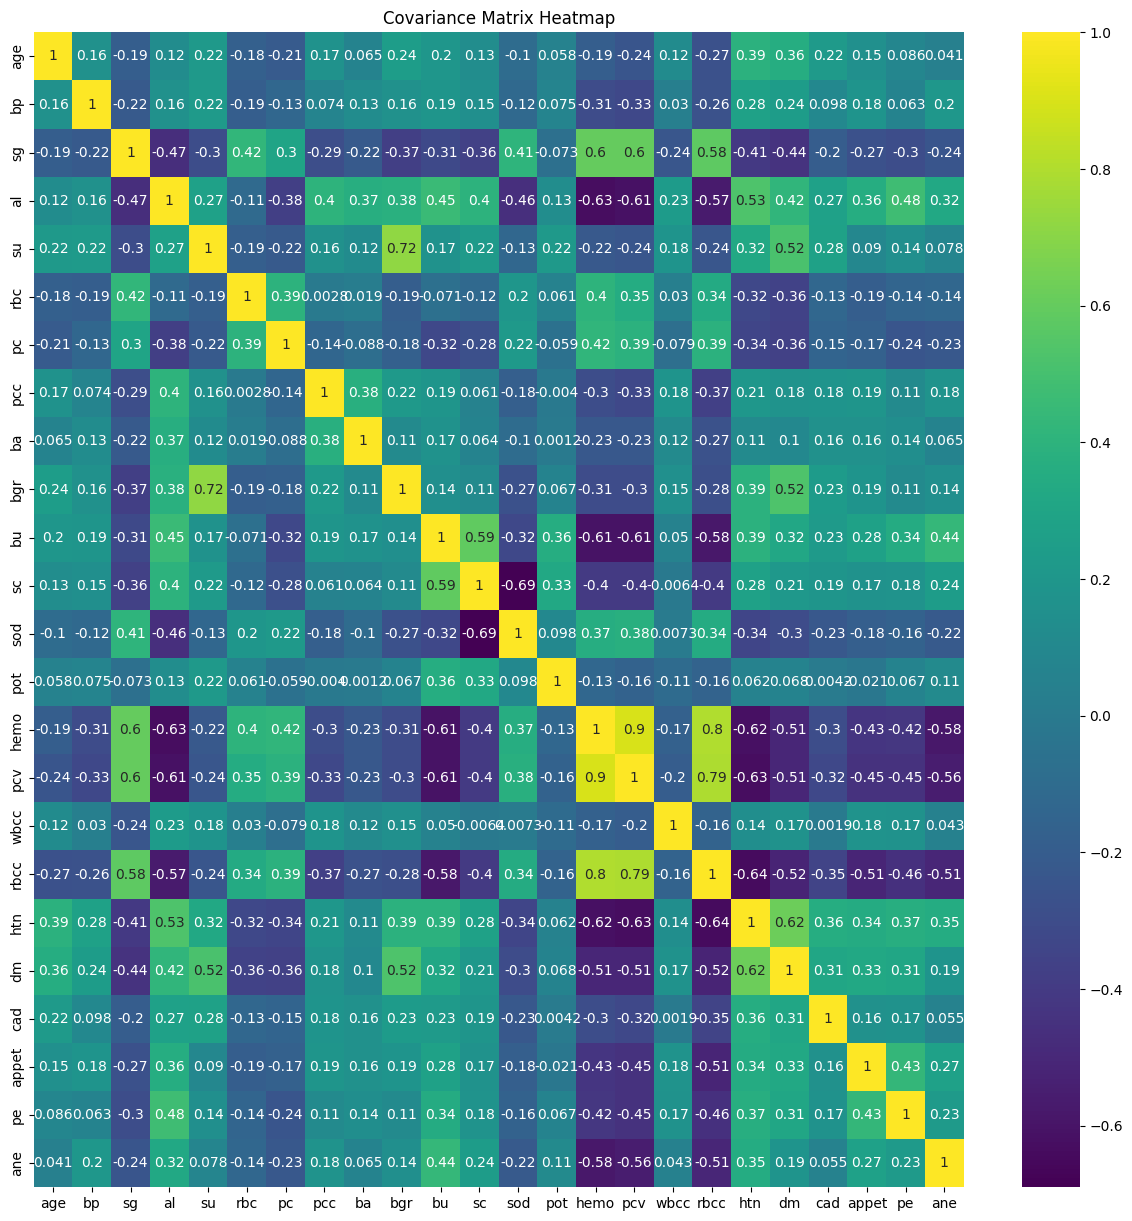

In [827]:
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr(),
        cmap='viridis', 
        annot=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [828]:
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
dtype: int64

In [829]:
y.isnull().sum()

class    0
dtype: int64

In [830]:
X_drop= X.dropna()
X_drop

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
5,0.496661,0.990117,1.015,3.0,0.0,-1,-1,0,0,-0.935155,...,-0.112239,0.012867,-0.206202,-0.300401,1,1,0,0,1,0
9,0.088445,0.990117,1.020,2.0,0.0,0,0,1,0,-0.985679,...,-1.040585,-1.101161,1.256651,-0.984385,1,1,0,1,0,1
11,0.671612,-0.473370,1.010,3.0,0.0,0,0,1,0,2.929931,...,-0.593604,-0.766953,-1.328856,-0.886673,1,1,0,1,1,0
12,0.963195,-0.473370,1.015,3.0,1.0,-1,1,1,0,0.757399,...,-0.971819,-1.212564,1.290671,-1.277521,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0,0,0,0,0,0


6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.


9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

16. **Link** to the public GitHub repository.

# Algorithm2:

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

16. **Link** to the public GitHub repository.

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
